<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.** 

# Simple Linear Regression for Predicting Salary

### 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

### 2) Reading dataset

In [3]:
df = pd.read_csv("Salary_Data.csv")

### 3) Exploratory Data Analysis

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
df.sample(10)   #Random Sample of 10 rows 

,YearsExperience,Salary
9,3.7,57189.0
20,6.8,91738.0
23,8.2,113812.0
24,8.7,109431.0
8,3.2,64445.0
6,3.0,60150.0
17,5.3,83088.0
7,3.2,54445.0
21,7.1,98273.0
22,7.9,101302.0


In [7]:
df.shape        # Rows and Columns of the Dataset. 

(30, 2)

In [8]:
#Data type of the Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


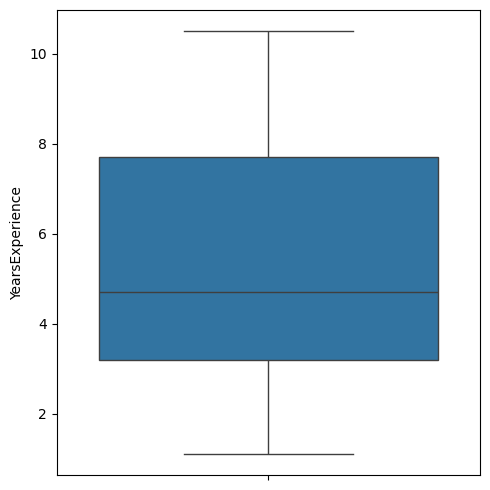

In [11]:
# Check for Outliers

fig, axs = plt.subplots(1, figsize = (5,5))
plt1 = sns.boxplot(df['YearsExperience'])
plt.tight_layout()

In [12]:
# Checking the Null Values in the Data. 

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
# Checking zero values in the data. 

(df == 0).sum()   

YearsExperience    0
Salary             0
dtype: int64

In [14]:
df.Salary.value_counts()

Salary
39343.0     1
46205.0     1
122391.0    1
112635.0    1
116969.0    1
105582.0    1
109431.0    1
113812.0    1
101302.0    1
98273.0     1
91738.0     1
93940.0     1
81363.0     1
83088.0     1
66029.0     1
67938.0     1
61111.0     1
57081.0     1
56957.0     1
55794.0     1
63218.0     1
57189.0     1
64445.0     1
54445.0     1
60150.0     1
56642.0     1
39891.0     1
43525.0     1
37731.0     1
121872.0    1
Name: count, dtype: int64

In [15]:
df.Salary.value_counts().sum()     #Total Unique Values in the Data. 

30

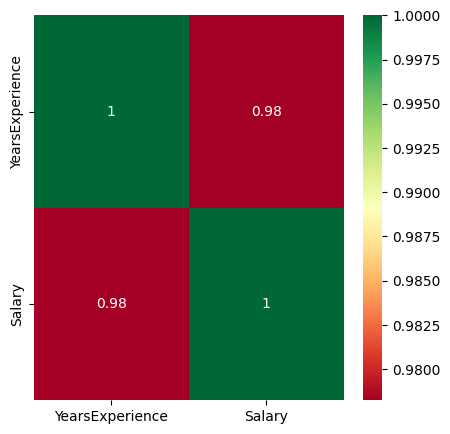

In [16]:
# Correlation of input and output columns

corrmat = df.corr()                        #pariwise correlation of all the columns 
top_corr_features = corrmat.index                    
plt.figure(figsize = (5,5))

#heatmap of the data

g = sns.heatmap(df[corrmat.index].corr(),annot = True, cmap="RdYlGn") # annot present values in the blocks. cmap = colormap 

# g = sns.heatmap(df[top_corr_features].corr(),annot = True, cmap="RdYlGn") 

In [17]:
df.corr()   #Correlation between Variables.

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


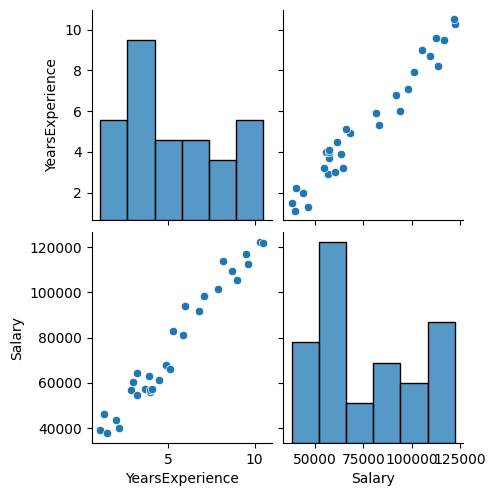

In [18]:
import seaborn as sns
sns.pairplot(df)

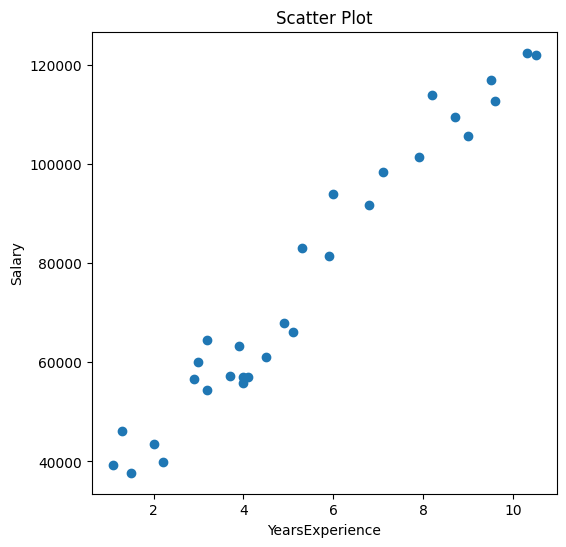

In [19]:
# correlation with scatter plot

X = df['YearsExperience']
y = df['Salary']  

plt.figure(figsize=(6,6))

plt.scatter(X, y, label = "label_name" )

# Set x and y axes labels
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.title('Scatter Plot')

plt.show()

### 4) Model Building

## Simple Linear Regression Model using Classic methods (manual calculation)

In [20]:
df1 = pd.DataFrame({'YearsExperience as X': df['YearsExperience'], 'Salary as Y ':df['Salary'] })   
df1.head(10)

,YearsExperience as X,Salary as Y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [21]:
# Calculating the mean of X and Y 

mean_x = df['YearsExperience'].sum() / df['YearsExperience'].count()  
round(mean_x,2) 

mean_y = df['Salary'].sum() / df['Salary'].count()   
round(mean_y,2) 

print(round(mean_x,2) , round(mean_y,2))

5.31 76003.0


In [22]:
X = df['YearsExperience'].values          
Y = df['Salary'].values 
n = len(X)


# Using the formula to calculate m and c

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)

In [23]:
Y = m * 1.3 + c  

print(m)
print(c)
print(Y)

9449.962321455077
25792.20019866869
38077.15121656029


## Simple Linear Regression Model using OLS method

In [24]:
#  OLS = ordinary least square method. 

import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)                                   
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        11:58:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple Linear Regression model using sklearn

In [27]:
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression

regr = skl_lm.LinearRegression()
X = df.YearsExperience.values.reshape(-1,1)
y = df.Salary

regr.fit(X,y)

LinearRegression()

In [28]:
regr.intercept_

25792.20019866871

In [29]:
regr.coef_

array([9449.96232146])

In [30]:
regr.score(X, y)

0.9569566641435086

In [31]:
# Accuracy Score of the Model.

(regr.score(X,y) ) * 100             

95.69566641435085

## Observation

### We can see that Our values from the Classical Method and Sklearn Model are same.

In [32]:
# Now We can Make Prediction. 

regr.predict([[1.1]])

array([36187.15875227])

In [33]:
list1 = []

for x in df['YearsExperience']:
    print(regr.predict([[x]]))   
    list1.append(regr.predict([[x]]))

[36187.15875227]
[38077.15121656]
[39967.14368085]
[44692.12484158]
[46582.11730587]
[53197.09093089]
[54142.08716303]
[56032.07962732]
[56032.07962732]
[60757.06078805]
[62647.05325234]
[63592.04948449]
[63592.04948449]
[64537.04571663]
[68317.03064522]
[72097.0155738]
[73987.00803809]
[75877.00050238]
[81546.97789525]
[82491.9741274]
[90051.94398456]
[92886.932681]
[100446.90253816]
[103281.8912346]
[108006.87239533]
[110841.86109176]
[115566.84225249]
[116511.83848464]
[123126.81210966]
[125016.80457395]


In [34]:
from itertools import chain
flatten_list = list(chain.from_iterable(list1))
str(flatten_list)
results = list(map(float, flatten_list))
results

[36187.15875226929,
 38077.151216560305,
 39967.143680851324,
 44692.12484157886,
 46582.11730586988,
 53197.09093088842,
 54142.08716303393,
 56032.07962732494,
 56032.07962732494,
 60757.060788052484,
 62647.053252343496,
 63592.049484489005,
 63592.049484489005,
 64537.04571663451,
 68317.03064521654,
 72097.01557379858,
 73987.00803808958,
 75877.0005023806,
 81546.97789525366,
 82491.97412739915,
 90051.9439845632,
 92886.93268099973,
 100446.90253816379,
 103281.8912346003,
 108006.87239532784,
 110841.86109176437,
 115566.84225249192,
 116511.83848463741,
 123126.81210965598,
 125016.80457394698]

In [35]:
df1 = pd.DataFrame({'Actual': df['Salary'], 'Predicted': results, 'Difference': round( (df['Salary']-results),2 ) }) 
df1.head(10)


,Actual,Predicted,Difference
0,39343.0,36187.158752,3155.84
1,46205.0,38077.151217,8127.85
2,37731.0,39967.143681,-2236.14
3,43525.0,44692.124842,-1167.12
4,39891.0,46582.117306,-6691.12
5,56642.0,53197.090931,3444.91
6,60150.0,54142.087163,6007.91
7,54445.0,56032.079627,-1587.08
8,64445.0,56032.079627,8412.92
9,57189.0,60757.060788,-3568.06


### 5) Model Evaluation with Regression Metrics

#### 1) Sum of residuals

In [36]:
#Sum of Residuals 

round( (df['Salary']-results),2 ).sum() 

0.0200000000018008

#### 2) Square Sum of Residual errors

In [37]:
# Square Sum of Residual errors are : 
SRS = round( (df['Salary']-results),2 )**2    
SRS
SRS.sum()

938128831.3961998

#### 3) R2 Value

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)                       # Value of Target variable when we predict it with the Independent variable. 
r2_score(df['Salary'], results) 

0.9569566641435086

#### 4) Regression plot

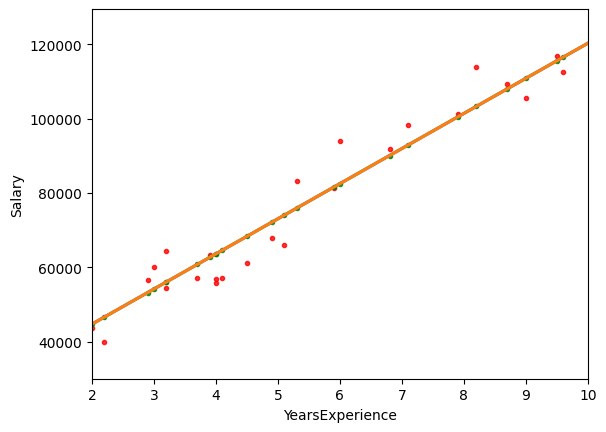

In [39]:
# Plotting the actual line
sns.regplot(x=df['YearsExperience'], y=df['Salary'], order=1, ci=None, scatter_kws={'color':'r', 's':9})

# Plotting the predicted line
sns.regplot(x=df['YearsExperience'], y=results, order=1, ci=None, scatter_kws={'color':'g', 's':9})

plt.xlim(2, 10)
plt.ylim(bottom=30000)

plt.show()